In [ ]:
import pandas as pd
import altair as alt
from scipy.stats import chi2_contingency
import seaborn as sns
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
campaign['poutcome'].value_counts()


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
#need to create bins for the age groupings
#campaign["age"].describe()
#campaign["ageGroup"] = campaign["age"].map("age" )

In [ ]:
#checks if the number of times called is associated with the outcome
lessContact = campaign[campaign["campaign"] <= 20]
numCalls = pd.crosstab(lessContact["campaign"], lessContact["y"])#, normalize = 'index')
numCallsPercent = pd.crosstab(lessContact["campaign"], lessContact["y"], normalize = 'index')
numCalls
callC, callP, callDof, callExpected = chi2_contingency(numCalls)
callP
#callExpected

3.6261304544385517e-32

In [ ]:
#day of contact is related to them signing up

day = pd.crosstab(campaign["day_of_week"], campaign["y"])
day
dayC, dayP, dayDof, dayExpected = chi2_contingency(day)
dayP


2.9584820052785324e-05

In [ ]:
#Marital status
marriage = pd.crosstab(campaign["marital"], campaign["y"])
marriage
mC, mP, mDof, mExpected = chi2_contingency(marriage)
mP

2.068014648442211e-26

[Text(33.0, 0.5, 'Number of times called this campaign'),
 Text(0.5, 15.0, 'Percent who signed up (Decimal)'),
 Text(0.5, 1.0, 'Percent of people who signed up \nfor the number of times called')]

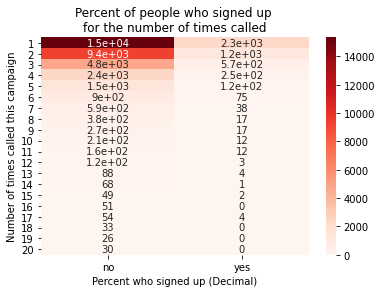

In [ ]:
x = sns.heatmap(numCalls, annot = True, cmap="Reds").set(xlabel = "Percent who signed up (Decimal)", ylabel = "Number of times called this campaign", title = "Percent of people who signed up \nfor the number of times called")
#graph = callActual.get_figure()
x


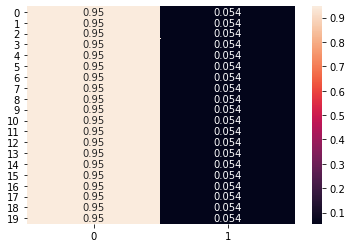

In [ ]:
callExpected = sns.heatmap(callExpected, annot = True)

In [ ]:
prevCampaign = campaign[campaign["pdays"] < 999]
prevCampaign.head()
alt.Chart(prevCampaign).mark_bar().encode(
    alt.X("y"),
    alt.Y('count(y)'),
    column = "poutcome"
)
#pd.crosstab(prevCampaign["poutcome"], prevCampaign["y"])

alt.Chart(...)

In [ ]:
alt.Chart()

In [ ]:
# makes a graph of feature importance
feature_dat = pd.DataFrame({
    "values": tree_clf.feature_importances_, 
    "features": X_train.columns
})

graph1 = (alt.Chart(feature_dat.query('values > 0.02'))
    .encode(
        alt.X('values', title = "Values"), 
        alt.Y('features', sort = "-x", title = "Features"))
    .mark_bar()
    .properties(
        title = {
            "text": "Using tree.DecisionTreeClassifier"
        }
    )
)

graph1


NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,neigh.predict(X_test))


# Import the plot_confusion_matrix function and use it to plot the confusion
# matrix for the test data.
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()


Actionable patterns:
middle age people who are signed up or signed up this campaign explore
